In [2]:
import cv2
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout
from keras import backend as K
import keras
from keras.models import Sequential, Model
from keras.models import load_model
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import MaxPool2D
from google.colab.patches import cv2_imshow

In [3]:
train_path="/content/drive/MyDrive/cat_train_dog"
test_path = "/content/drive/MyDrive/cat_test1_dog"

class_names=os.listdir(train_path)
class_names_test = os.listdir(test_path)


In [4]:
print(class_names)
print(class_names_test)


['Dog', 'cat']
['cat', 'Dog']


In [5]:
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)
test_datagen = ImageDataGenerator()


In [6]:
train_generator = train_datagen.flow_from_directory("/content/drive/MyDrive/cat_train_dog",target_size=(224, 224),batch_size=32,shuffle=True,class_mode='binary')
test_generator = test_datagen.flow_from_directory("/content/drive/MyDrive/cat_test1_dog",target_size=(224,224),batch_size=32,shuffle=False,class_mode='binary')

Found 202 images belonging to 2 classes.
Found 102 images belonging to 2 classes.


In [30]:
def VGG16():
    model = Sequential()
    model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Dropout(0.25))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),name='vgg16'))
    model.add(Flatten(name='flatten'))
    model.add(Dense(256, activation='relu', name='fc1'))
    model.add(Dense(128, activation='relu', name='fc2'))
    model.add(Dense(1, activation='sigmoid', name='output'))
    return model

In [31]:
model=VGG16()

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 56, 56, 256)      

In [33]:
Vgg16 = Model(inputs=model.input, outputs=model.get_layer('vgg16').output)

In [35]:
for layer in Vgg16.layers:
    layer.trainable = False

In [36]:
for layer in model.layers:
    print(layer, layer.trainable)

<keras.layers.convolutional.Conv2D object at 0x7f3b484eb210> False
<keras.layers.convolutional.Conv2D object at 0x7f3bb8c6cd50> False
<keras.layers.pooling.MaxPooling2D object at 0x7f3b48469610> False
<keras.layers.convolutional.Conv2D object at 0x7f3b48475590> False
<keras.layers.convolutional.Conv2D object at 0x7f3bb8c6ccd0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f3b4856e650> False
<keras.layers.convolutional.Conv2D object at 0x7f3b48512dd0> False
<keras.layers.convolutional.Conv2D object at 0x7f3b484a4d90> False
<keras.layers.convolutional.Conv2D object at 0x7f3b484a1f50> False
<keras.layers.pooling.MaxPooling2D object at 0x7f3b484434d0> False
<keras.layers.convolutional.Conv2D object at 0x7f3b484a4590> False
<keras.layers.convolutional.Conv2D object at 0x7f3b485bdad0> False
<keras.layers.convolutional.Conv2D object at 0x7f3b48496a10> False
<keras.layers.pooling.MaxPooling2D object at 0x7f3b48487790> False
<keras.layers.convolutional.Conv2D object at 0x7f3b4846d8d0> F

In [37]:
opt = SGD(learning_rate=1e-4, momentum=0.9)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

In [38]:
es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=20)

In [39]:
mc = ModelCheckpoint('/content/gdrive/My Drive/best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True)

In [40]:
history = model.fit_generator(train_generator,validation_data=test_generator,epochs=100,verbose=1,callbacks=[mc,es])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
7/7 [==============================] - 6s 633ms/step - loss: 0.6925 - accuracy: 0.5464 - val_loss: 0.6901 - val_accuracy: 0.5196
Epoch 2/100
7/7 [==============================] - 3s 474ms/step - loss: 0.7195 - accuracy: 0.4727 - val_loss: 0.6852 - val_accuracy: 0.5490
Epoch 3/100
7/7 [==============================] - 3s 464ms/step - loss: 0.6846 - accuracy: 0.5149 - val_loss: 0.6865 - val_accuracy: 0.5000
Epoch 4/100
7/7 [==============================] - 3s 453ms/step - loss: 0.6971 - accuracy: 0.4829 - val_loss: 0.6792 - val_accuracy: 0.5588
Epoch 5/100
7/7 [==============================] - 3s 464ms/step - loss: 0.7033 - accuracy: 0.5039 - val_loss: 0.6758 - val_accuracy: 0.5980
Epoch 6/100
7/7 [==============================] - 3s 458ms/step - loss: 0.6894 - accuracy: 0.5433 - val_loss: 0.6766 - val_accuracy: 0.5882
Epoch 7/100
7/7 [==============================] - 3s 452ms/step - loss: 0.6844 - accuracy: 0.5053 - val_loss: 0.6756 - val_accuracy: 0.6078
Epoch 8/100
7

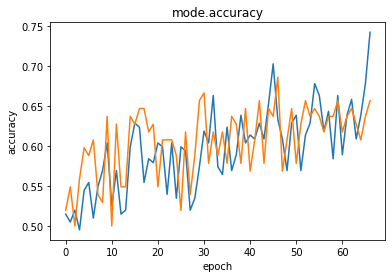

In [41]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('mode.accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()




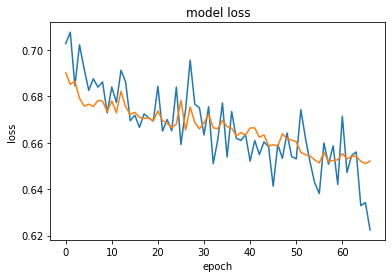

In [42]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [43]:
model.load_weights("/content/gdrive/My Drive/best_model.h5")

In [44]:
model.evaluate_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.6585763692855835, 0.686274528503418]

In [45]:
x = load_model('/content/gdrive/My Drive/best_model.h5')

In [46]:
model_json = model.to_json()
with open("/content/gdrive/My Drive/model.json","w") as json_file:
  json_file.write(model_json)

In [51]:
from keras.models import model_from_json

In [66]:
 def predict_(image_path):
    #Load the Model from Json File
    json_file = open('/content/gdrive/My Drive/model.json', 'r')
    model_json_c = json_file.read()
    json_file.close()
    model_c = model_from_json(model_json_c)
    #Load the weights
    model_c.load_weights("/content/gdrive/My Drive/best_model.h5")
    #Compile the model
    opt = SGD(lr=1e-4, momentum=0.9)
    model_c.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
    #load the image you want to classify
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224,224))
    cv2_imshow(image)
    #predict the image
    preds = model_c.predict(np.expand_dims(image, axis=0))[0]
    print (preds)
    if preds>0.5:
        print("Predicted Label:Cat")
    else:
        print("Predicted Label: Dog")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


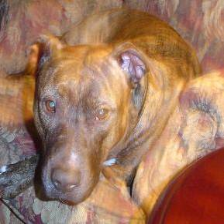

[0.46228525]
Predicted Label: Dog


In [67]:
predict_("/content/drive/MyDrive/cat_test1_dog/Dog/dog.5001.jpg")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


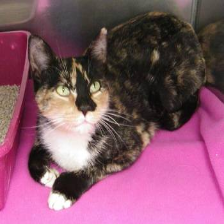

[0.6778882]
Predicted Label:Cat


In [68]:
predict_("/content/drive/MyDrive/cat_test1_dog/cat/cat.681.jpg")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


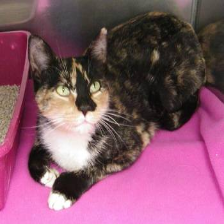

[0.6778882]
Predicted Label:Cat


In [69]:
predict_("/content/drive/MyDrive/cat_test1_dog/cat/cat.681.jpg")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


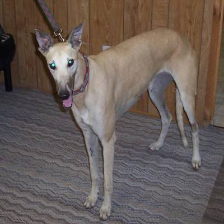

[0.4918696]
Predicted Label: Dog


In [70]:
predict_('/content/drive/MyDrive/cat_test1_dog/Dog/dog.5013.jpg')